## Census Income Data Set 

In [1]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install requests

In [2]:
# Import libraries necessary for this project

# Linear Algebra
import numpy as np

# Data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from __future__ import division
import urllib
import os
import io
import requests

# Pretty display for notebooks
%matplotlib inline

# Getting the Data

In [3]:
# Load the Census dataset from online
ics_census_income_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
s=requests.get(ics_census_income_url).content

In [ ]:
# Extract the data and save to file
orig_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
orig_data.columns = ['age','workclass','fnlwgt','education_level','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
base_data_dir = os.path.join(os.getcwd(), 'preproc')


The modified census dataset consists of approximately 32,000 data points, with each datapoint having 13 features. This dataset is a modified version of the dataset published in the paper "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", by Ron Kohavi. You may find this paper online, with the original dataset hosted on [UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income).

**The dataset has 32561 examples and 14 features + the target variable (income).** 6 features are integers and 8 are objects.

#### Features

**age**: Age

**workclass**: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

**fnlwgt**: continuous

**education_level**: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)

**education-num**: Number of educational years completed

**marital-status**: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

**occupation**: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

**relationship**: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

**race**: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

**sex**: Sex (Female, Male)

**capital-gain**: Monetary Capital Gains

**capital-loss**: Monetary Capital Losses

**hours-per-week**: Average Hours Per Week Worked

**native-country**: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

### Target Variable

**income**: Income Class (<=50K, >50K)

In [4]:
# Drop "fnlwgt" from the dataset, because it does not contribute to predicting a persons income. 
orig_data = orig_data.drop(['fnlwgt'], axis=1)
orig_data.head(n=8)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [5]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
age                32560 non-null int64
workclass          32560 non-null object
education_level    32560 non-null object
education-num      32560 non-null int64
marital-status     32560 non-null object
occupation         32560 non-null object
relationship       32560 non-null object
race               32560 non-null object
sex                32560 non-null object
capital-gain       32560 non-null int64
capital-loss       32560 non-null int64
hours-per-week     32560 non-null int64
native-country     32560 non-null object
income             32560 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


# Data Preprocessing

### Converting Features

The following features need to be converted: 
workclass, education_level, marital-status, occupation, relationship, race, sex, native-country, and income 

In [6]:
# workclass:
workclass = {' State-gov':1, ' Self-emp-not-inc':2, ' Private':3, ' Federal-gov':4,
       ' Local-gov':5, ' ?':6, ' Self-emp-inc':7, ' Without-pay':8,
       ' Never-worked':9}
orig_data['workclass'] = orig_data['workclass'].map(workclass)

# education_level:
education_level = {' Bachelors':1, ' HS-grad':2, ' 11th':3, ' Masters':4, ' 9th':5,
       ' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9,
       ' Doctorate':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' 1st-4th':14,
       ' Preschool':15, ' 12th':16}
orig_data['education_level'] = orig_data['education_level'].map(education_level)

# marital-status:
marital_status = {' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3,
       ' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6,
       ' Widowed':7}
orig_data['marital-status'] = orig_data['marital-status'].map(marital_status)

# occupation:
occupation = {' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,
       ' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7,
       ' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10,
       ' Tech-support':11, ' ?':12, ' Protective-serv':13, ' Armed-Forces':14,
       ' Priv-house-serv':15}
orig_data['occupation'] = orig_data['occupation'].map(occupation)

# relationship:
relationship = {' Not-in-family':1, ' Husband':2, ' Wife':3, ' Own-child':4, ' Unmarried':5,
       ' Other-relative':6}
orig_data['relationship'] = orig_data['relationship'].map(relationship)

# race:
race = {' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,
       ' Other':5}
orig_data['race'] = orig_data['race'].map(race)

# sex:
sex = {' Male':1, ' Female':2}
orig_data['sex'] = orig_data['sex'].map(sex)

# native-country:
native_country = {' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' ?':6, ' Mexico':7,
       ' South':8, ' Puerto-Rico':9, ' Honduras':10, ' England':11, ' Canada':12,
       ' Germany':13, ' Iran':14, ' Philippines':15, ' Italy':16, ' Poland':17,
       ' Columbia':18, ' Cambodia':19, ' Thailand':20, ' Ecuador':21, ' Laos':22,
       ' Taiwan':23, ' Haiti':24, ' Portugal':25, ' Dominican-Republic':26,
       ' El-Salvador':27, ' France':28, ' Guatemala':29, ' China':30, ' Japan':31,
       ' Yugoslavia':32, ' Peru':33, ' Outlying-US(Guam-USVI-etc)':34, ' Scotland':35,
       ' Trinadad&Tobago':36, ' Greece':37, ' Nicaragua':38, ' Vietnam':39, ' Hong':40,
       ' Ireland':41, ' Hungary':42, ' Holand-Netherlands':43}
orig_data['native-country'] = orig_data['native-country'].map(native_country)

# workclass:
income = {' <=50K':0, ' >50K':1}
orig_data['income'] = orig_data['income'].map(income)

In [7]:
# Display data
orig_data.head(n=8)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,2,1,13,2,2,2,1,1,0,0,13,1,0
1,38,3,2,9,3,3,1,1,1,0,0,40,1,0
2,53,3,3,7,2,3,2,2,1,0,0,40,1,0
3,28,3,1,13,2,4,3,2,2,0,0,40,2,0
4,37,3,4,14,2,2,3,1,2,0,0,40,1,0
5,49,3,5,5,4,5,1,2,2,0,0,16,3,0
6,52,2,2,9,2,2,2,1,1,0,0,45,1,1
7,31,3,4,14,1,4,1,1,2,14084,0,50,1,1


### Creating Categories

In [8]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
age_group = ['0_10', '11_20', '21_30', '31_40','41_50', '51_60', '61_70', '71_100']
orig_data['age_cat'] = pd.cut(orig_data['age'], bins, labels=age_group)

In [9]:
# Check for missing data
total = orig_data.isnull().sum().sort_values(ascending=False)
percent1 = orig_data.isnull().sum() / orig_data.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age_cat,0,0.0
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0


### Save processed data into preproc folder

In [10]:
base_data_dir = os.path.join(os.getcwd(), 'preproc')
os.makedirs(base_data_dir, exist_ok=True)
censusdata_preproc_dir = os.path.join(base_data_dir, 'censusdata_preproc')
orig_data.to_pickle(censusdata_preproc_dir)

# Data Exploration

In [11]:
# Load preprocessed data if necessary:
proc_data = pd.read_pickle(censusdata_preproc_dir)

**What features can contribute to income?**

**1. Age and Sex**

/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


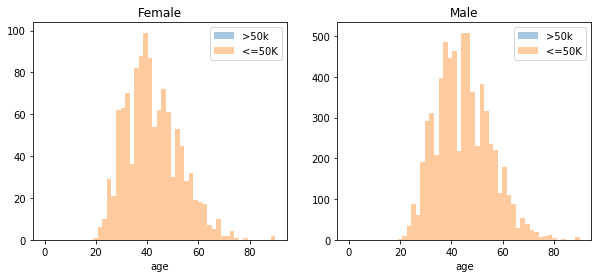

In [12]:
n_greater_50k = '>50k'
n_at_most_50k = '<=50K'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = proc_data[orig_data['sex']== 2]
men = proc_data[orig_data['sex'] == 1]
ax = sns.distplot(women[women.income ==2].age.dropna(), bins=18, label = n_greater_50k, ax = axes[0], kde =False)
ax = sns.distplot(women[women.income ==1].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men.income ==2].age.dropna(), bins=18, label = n_greater_50k, ax = axes[1], kde = False)
ax = sns.distplot(men[men.income ==1].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Men have a high probability of earning >50K when they are between 30 and 60 years old. 
This is also true for women. However, for women the probability of earning >50K are higher between 25 and 50 years old. 

Since there seem to be **certain ages, which have increased odds of higher income**, I will create age groups later on.

**2. Workclass,Education level, Education num**

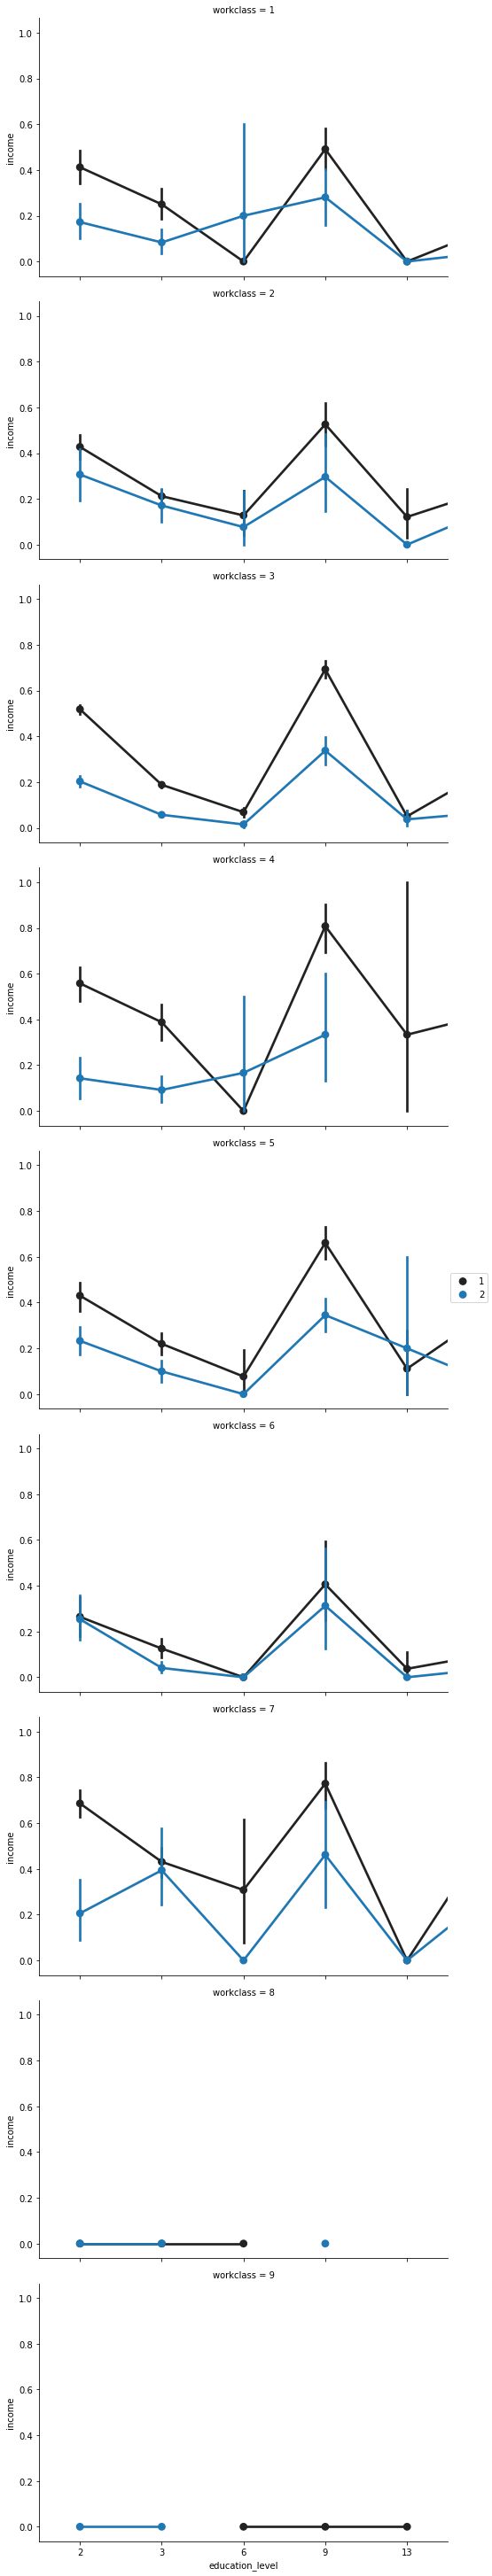

In [13]:
FacetGrid = sns.FacetGrid(proc_data, row='workclass', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'education_level', 'income', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Workclass seems to be correlated with income, depending on the gender.

**3. workclass**

In [14]:
proc_data['age_cat'].value_counts()

31_40     8545
21_30     8162
41_50     6983
51_60     4128
11_20     2410
61_70     1792
71_100     540
0_10         0
Name: age_cat, dtype: int64

 State-gov 1                             
 Self-emp-not-inc 2                             
 Private 3                             
 Federal-gov 4                             
 Local-gov 5                             
 ?       6                             
 Self-emp-inc 7                             
 Without-pay 8                             
 Never-worked 9                             


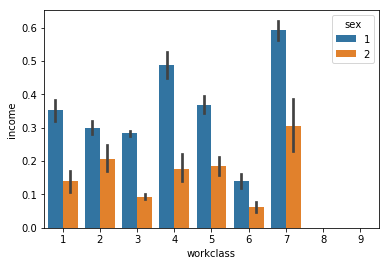

In [15]:
sns.barplot(x='workclass', y='income', data=proc_data, hue="sex")
# print( "{:<8} {:<30}".format('Key','Label'))
for keys in workclass:
    label = workclass[keys]
    print("{:<8} {:<30}".format(keys, label))

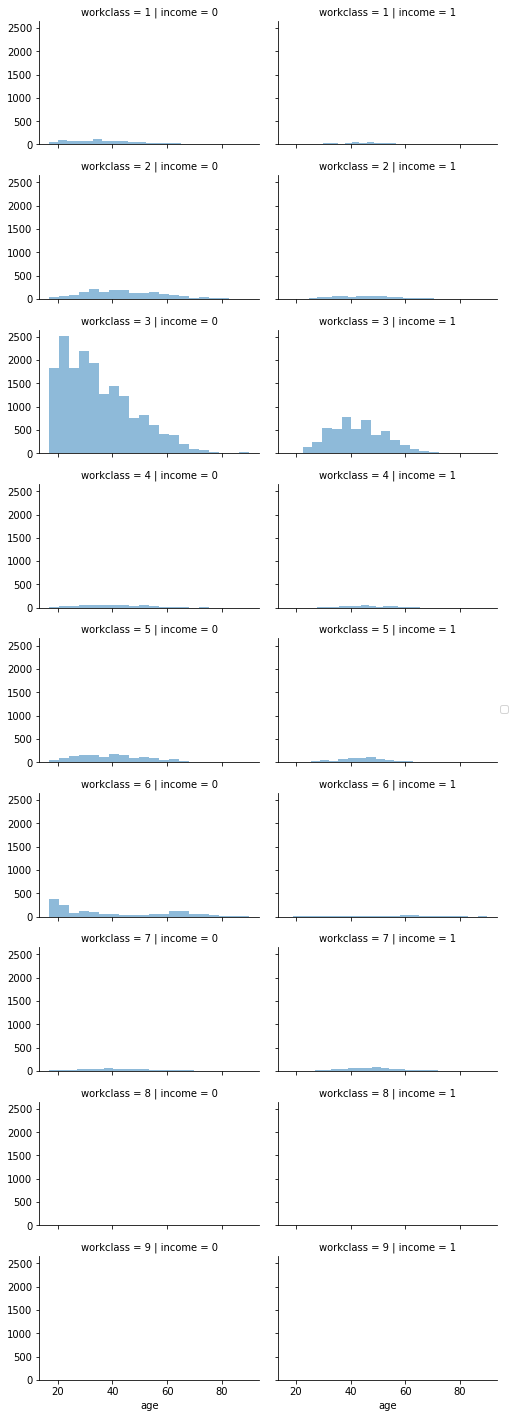

In [16]:
grid = sns.FacetGrid(proc_data, col='income', row='workclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

workclass is contributing to a persons income especially if this person is self-employed.

Working for the federal government shows a high probability of earning an income being <=50K and low probability of earning an income >50K

**4. education_level**

 Bachelors 1                             
 HS-grad 2                             
 11th    3                             
 Masters 4                             
 9th     5                             
 Some-college 6                             
 Assoc-acdm 7                             
 Assoc-voc 8                             
 7th-8th 9                             
 Doctorate 10                            
 Prof-school 11                            
 5th-6th 12                            
 10th    13                            
 1st-4th 14                            
 Preschool 15                            
 12th    16                            


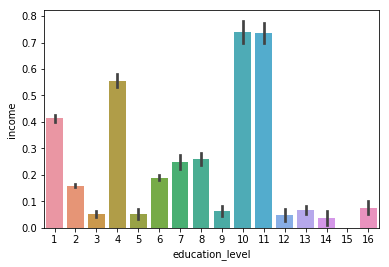

In [17]:
sns.barplot(x='education_level', y='income', data=orig_data)
for keys in education_level:
    label = education_level[keys]
    print("{:<8} {:<30}".format(keys, label))

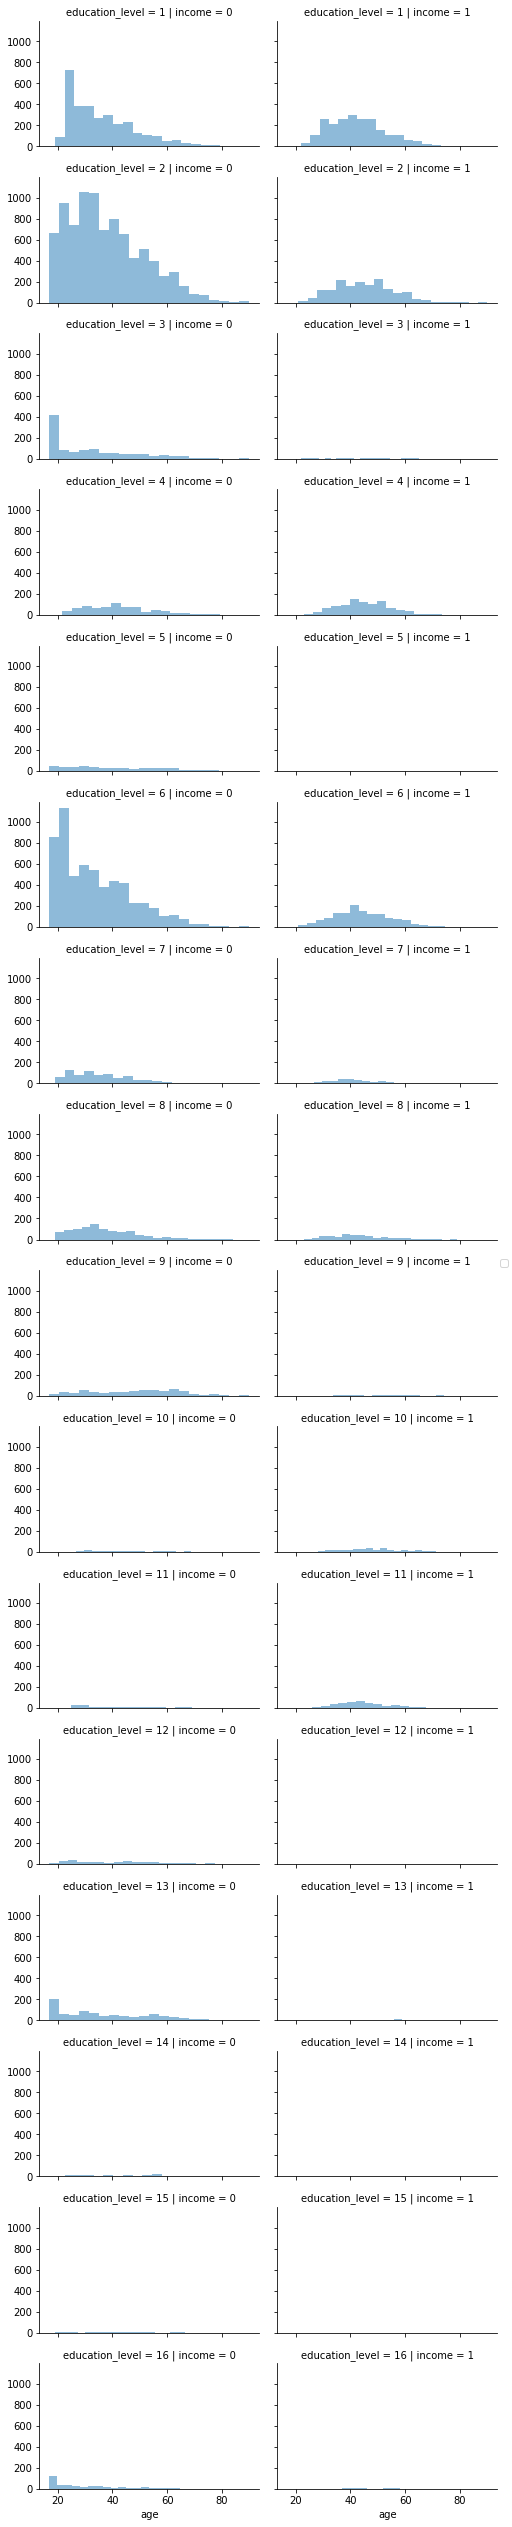

In [18]:
grid = sns.FacetGrid(proc_data, col='income', row='education_level', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**5. marital-status**

 Never-married 1                             
 Married-civ-spouse 2                             
 Divorced 3                             
 Married-spouse-absent 4                             
 Separated 5                             
 Married-AF-spouse 6                             
 Widowed 7                             


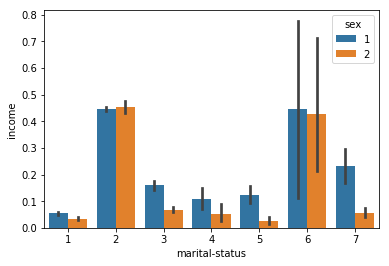

In [19]:
sns.barplot(x='marital-status', y='income', data=proc_data,  hue='sex')
for keys in marital_status:
    label = marital_status[keys]
    print("{:<8} {:<30}".format(keys, label))

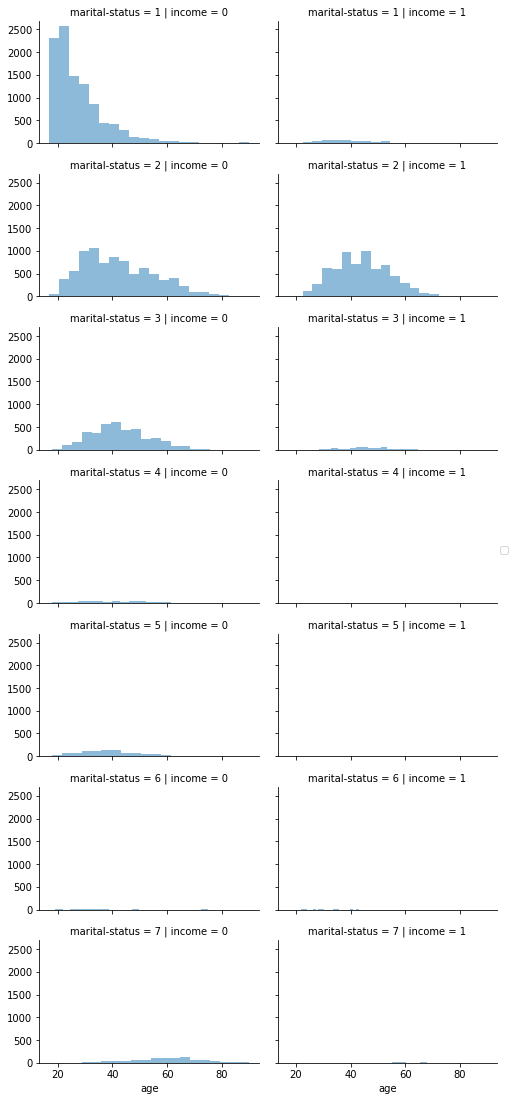

In [20]:
grid = sns.FacetGrid(proc_data, col='income', row='marital-status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**6. occupation**

 Adm-clerical 1                             
 Exec-managerial 2                             
 Handlers-cleaners 3                             
 Prof-specialty 4                             
 Other-service 5                             
 Sales   6                             
 Craft-repair 7                             
 Transport-moving 8                             
 Farming-fishing 9                             
 Machine-op-inspct 10                            
 Tech-support 11                            
 ?       12                            
 Protective-serv 13                            
 Armed-Forces 14                            
 Priv-house-serv 15                            


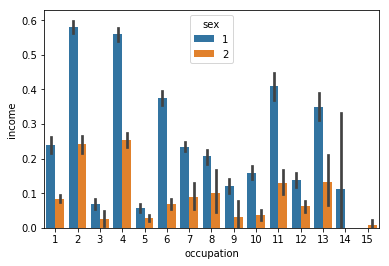

In [21]:
sns.barplot(x='occupation', y='income', data=proc_data, hue='sex')
for keys in occupation:
    label = occupation[keys]
    print("{:<8} {:<30}".format(keys, label))

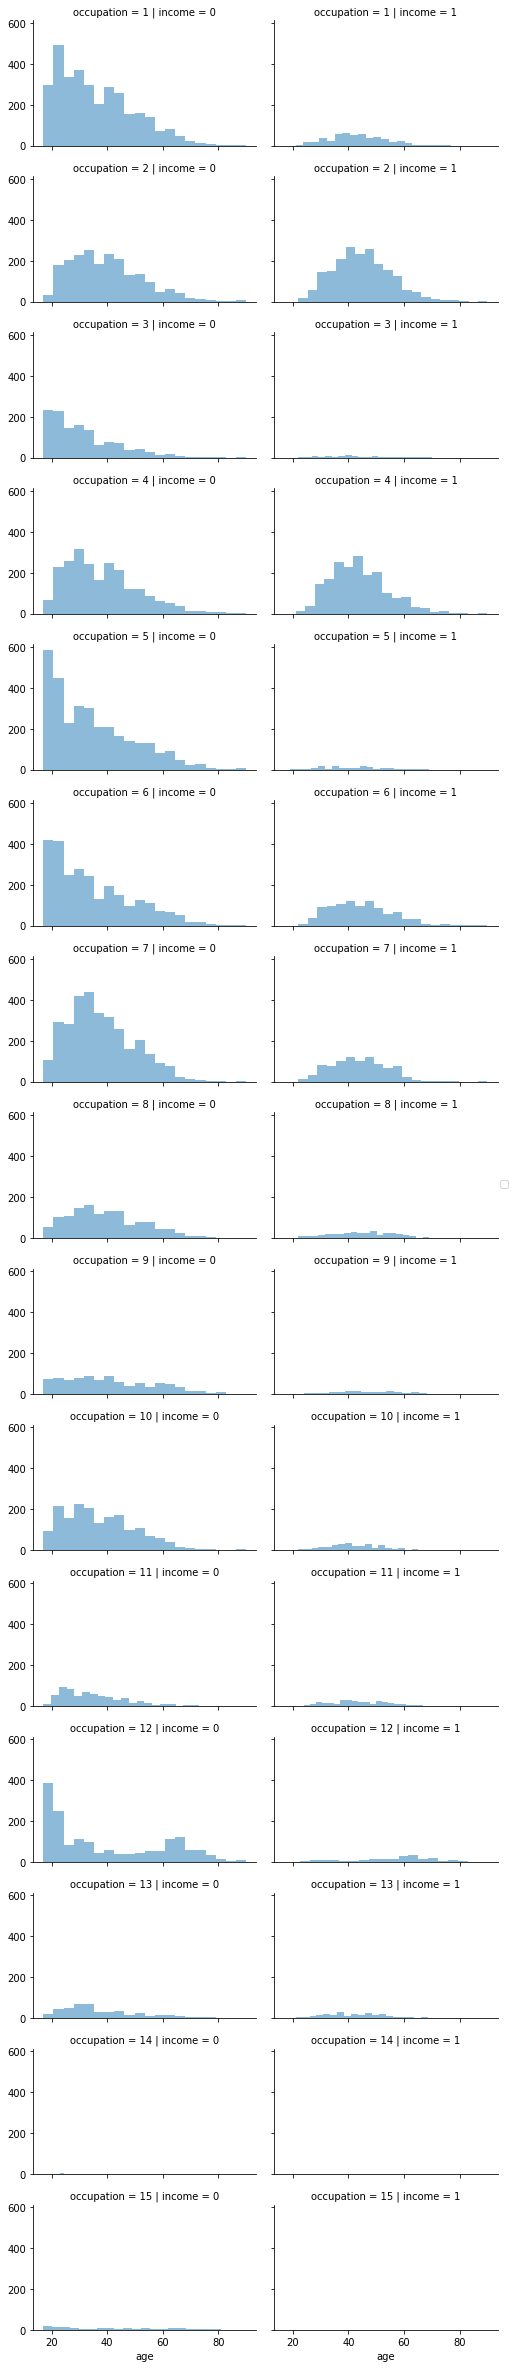

In [22]:
grid = sns.FacetGrid(proc_data, col='income', row='occupation', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**7. relationship**

 Not-in-family 1                             
 Husband 2                             
 Wife    3                             
 Own-child 4                             
 Unmarried 5                             
 Other-relative 6                             


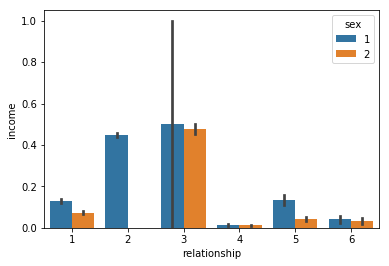

In [23]:
sns.barplot(x='relationship', y='income', data=proc_data, hue='sex')
for keys in relationship:
    label = relationship[keys]
    print("{:<8} {:<30}".format(keys, label))

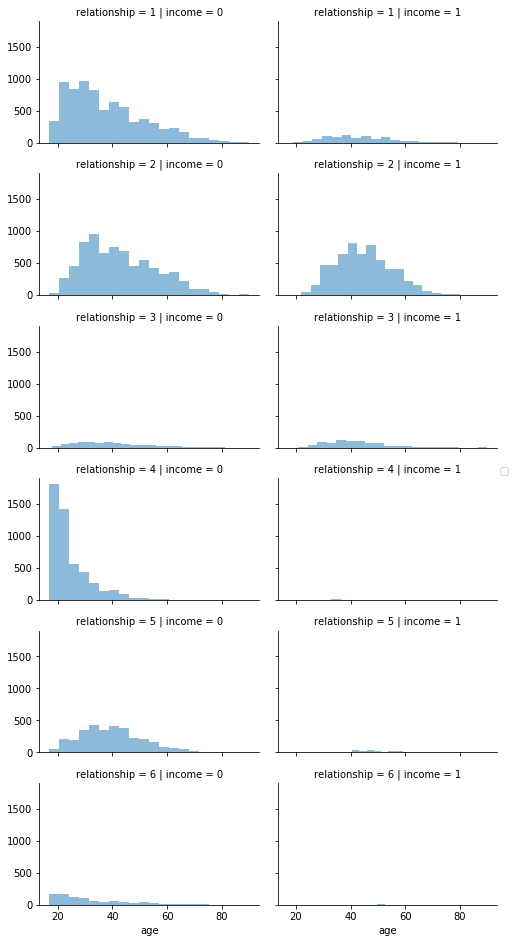

In [24]:
grid = sns.FacetGrid(proc_data, col='income', row='relationship', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**8. race**

 White   1                             
 Black   2                             
 Asian-Pac-Islander 3                             
 Amer-Indian-Eskimo 4                             
 Other   5                             


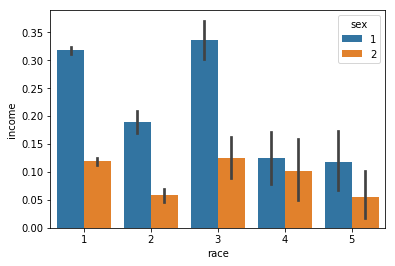

In [25]:
sns.barplot(x='race', y='income', data=proc_data, hue='sex')
for keys in race:
    label = race[keys]
    print("{:<8} {:<30}".format(keys, label))

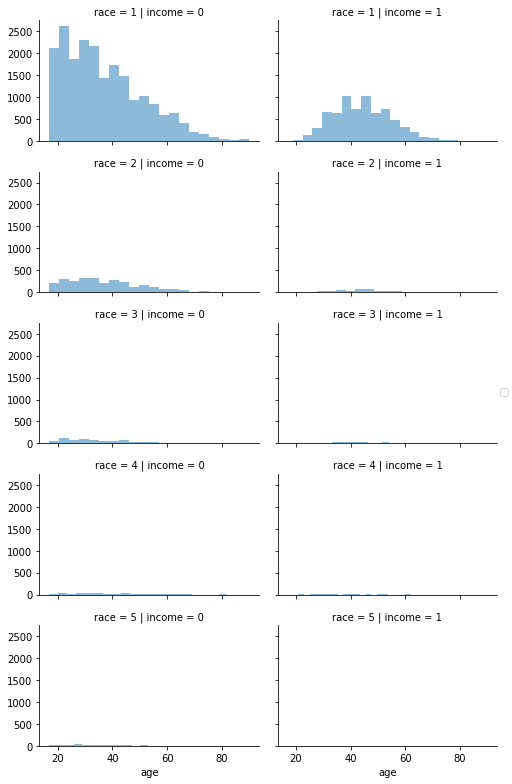

In [26]:
grid = sns.FacetGrid(orig_data, col='income', row='race', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**9. sex**

 Male    1                             
 Female  2                             


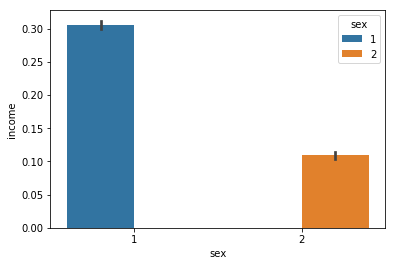

In [27]:
sns.barplot(x='sex', y='income', data=proc_data, hue='sex')
for keys in sex:
    label = sex[keys]
    print("{:<8} {:<30}".format(keys, label))

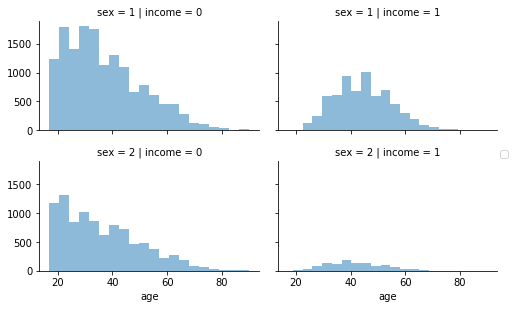

In [28]:
grid = sns.FacetGrid(proc_data, col='income', row='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [29]:
# TODO: Total number of records
n_records = len(proc_data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(proc_data[orig_data.income==1])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(proc_data[orig_data.income==0])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records*100.0

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 32560
Individuals making more than $50,000: 7841
Individuals making at most $50,000: 24719
Percentage of individuals making more than $50,000: 24.08%


# Building Machine Learning models

In [30]:
# Create the features matrix
X = proc_data[['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'age_cat']]
print("Shape of Features:%s " % (X.shape,))
# create the target vector
y =  proc_data[['income']]
print("Shape of Target:%s " % (y.shape,))

Shape of Features:(32560, 14) 
Shape of Target:(32560, 1) 


### Split into Training and Test Sets

In [31]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1)
print("Shape of Training Features:%s " % (X_train.shape,))
print("Shape of Training Target:%s " % (y_train.shape,))
print("Shape of Testing Features:%s " % (X_test.shape,))
print("Shape of Testing Target:%s " % (y_test.shape,))


Shape of Training Features:(29304, 14) 
Shape of Training Target:(29304, 1) 
Shape of Testing Features:(3256, 14) 
Shape of Testing Target:(3256, 1) 


### Fit Standardizaer to Training Set

In [32]:
# Create standardizer
standardizer = StandardScaler()

# Fit standardizer to training set
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Apply Standardizer To Training And Test Sets

In [33]:
# Apply to both training and test sets
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

### Stochastic Gradient Descent (SGD):

In [34]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train_std, np.ravel(y_train))
Y_pred = sgd.predict(X_test_std)

sgd.score(X_train_std, np.ravel(y_train))

acc_sgd = round(sgd.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [35]:
acc_sgd

82.24

### Random Forest:

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_std, np.ravel(y_train))

Y_prediction = random_forest.predict(X_test_std)

random_forest.score(X_train_std, np.ravel(y_train))
acc_random_forest = round(random_forest.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [37]:
acc_random_forest

97.75

### Logistic Regression:

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train_std, np.ravel(y_train))

Y_pred = logreg.predict(X_test_std)

acc_log = round(logreg.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [39]:
acc_log

82.74

### K Nearest Neighbor:

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train_std, np.ravel(y_train))  
Y_pred = knn.predict(X_test_std)  
acc_knn = round(knn.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [41]:
acc_knn

89.85

### Gaussian Naive Bayes:

In [45]:
gaussian = GaussianNB() 
gaussian.fit(X_train_std,  np.ravel(y_train))  
Y_pred = gaussian.predict(X_test_std)  
acc_gaussian = round(gaussian.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [43]:
acc_gaussian

81.15

### Perceptron

In [54]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train_std, np.ravel(y_train))

Y_pred = perceptron.predict(X_test_std)

acc_perceptron = round(perceptron.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [55]:
acc_perceptron

79.85

### Linear Support Vector Machine:

In [48]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_std, np.ravel(y_train))

Y_pred = linear_svc.predict(X_test_std)

acc_linear_svc = round(linear_svc.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [49]:
acc_linear_svc

82.65

### Decision Tree

In [50]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_std, np.ravel(y_train))  
Y_pred = decision_tree.predict(X_test_std)  
acc_decision_tree = round(decision_tree.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [51]:
acc_decision_tree

97.75

### Which is the best Model ?

In [56]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.75,Random Forest
97.75,Decision Tree
89.85,KNN
82.74,Logistic Regression
82.65,Support Vector Machines
82.24,Stochastic Gradient Decent
81.15,Naive Bayes
79.85,Perceptron


# K-Fold Cross Validation:

In [57]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train_std,  np.ravel(y_train), cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85163711 0.84924966 0.85153584 0.84368601 0.84812287 0.84675768
 0.84675768 0.85017065 0.83890785 0.85051195]
Mean: 0.8477337278657535
Standard Deviation: 0.0037680825888181187


Random forest classifier has an average accuracy of 85% with a standard deviation of 0.6%. The standard deviation shows us how precise the estimates are.

### Feature Importance

In [58]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.169
capital-gain,0.131
hours-per-week,0.111
education-num,0.102
occupation,0.095
relationship,0.084
marital-status,0.079
workclass,0.052
age_cat,0.043


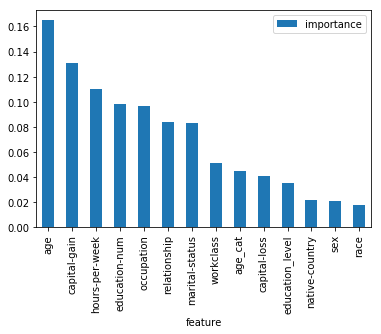

In [114]:
importances.plot.bar()

In [59]:
# drop sex
X_train  = X_train.drop("sex", axis=1)
X_test  = X_test.drop("sex", axis=1)

# drop race
X_train  = X_train.drop("race", axis=1)
X_test  = X_test.drop("race", axis=1)

# drop native-country
X_train  = X_train.drop("native-country", axis=1)
X_test  = X_test.drop("native-country", axis=1)


### Fit Standardizaer to Training Set

In [60]:
# Create standardizer
standardizer = StandardScaler()

# Fit standardizer to training set
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Apply Standardizer To Training And Test Sets

In [62]:
# Apply to both training and test sets
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

### Train Random Forest again

In [63]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train_std, np.ravel(y_train))
Y_prediction = random_forest.predict(X_test_std)

random_forest.score(X_train_std, np.ravel(y_train))

acc_random_forest = round(random_forest.score(X_train_std, np.ravel(y_train)) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.13 %


### out-of-bag samples

In [64]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 84.69 %


### Hyperparameter Tuning

In [67]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train_std, np.ravel(y_train))
# clf.best_params_

In [66]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'n_estimators': 100}

### Test New parameters:

In [68]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 35,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train_std, np.ravel(y_train))
Y_prediction = random_forest.predict(X_test_std)

random_forest.score(X_train_std, np.ravel(y_train))

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 86.50999999999999 %


### Further Evaluation

In [69]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest,X_train_std, np.ravel(y_train), cv=3)
confusion_matrix(np.ravel(y_train), predictions)

array([[20925,  1287],
       [ 2753,  4339]])

The first row is about the <=50K predictions: **20911 people were correctly classified as having income <=50K** (true negatives) and **1294 were wrongly classified as having income <=50K** (false positives).
    
The second row is about income >50K: **2714 people were wrongly classified as having income >50K** (false negatives) and **4386 were correctly classified as having income >50K (true positives)**.
    

In [70]:
# Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(np.ravel(y_train), predictions))
print("Recall:",recall_score(np.ravel(y_train), predictions))

Precision: 0.771240668325631
Recall: 0.6118161308516639


Our model predicts 77% of the time if a person is <=50 or >50 correctly(precision). The recall tells us that it predicted the income of 61% of the people who actually have income >50K

### F-Score:

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [71]:
from sklearn.metrics import f1_score
f1_score(np.ravel(y_train), predictions)

0.6823399905645542

### Precision Recall Curve

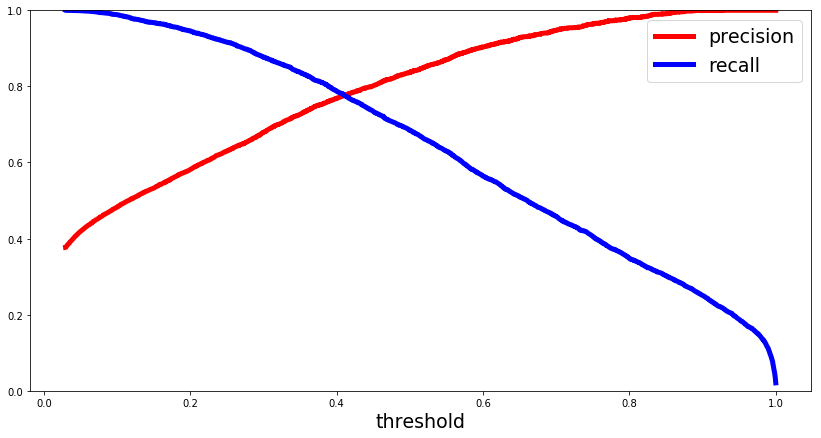

In [72]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train_std)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(np.ravel(y_train), y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 78%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other:

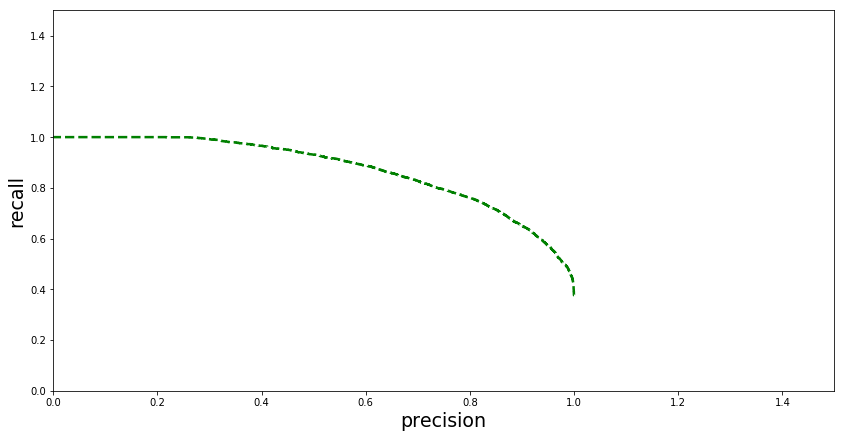

In [73]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

### ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

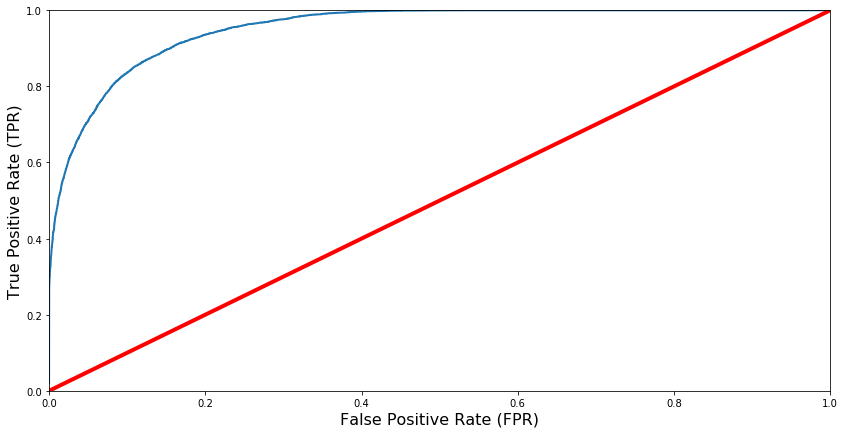

In [74]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.ravel(y_train), y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

### ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [75]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(np.ravel(y_train), y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9518281994742963


**Thats all folks!**